In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as hr
import dionysus as d
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from src.tda import ClutchMapper, visualize_complex
from src.data_pipeline import query_avg
import plotly.plotly as py

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

plt.style.use('ggplot')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [2]:
df = query_avg("HAVING position = 'WR'")

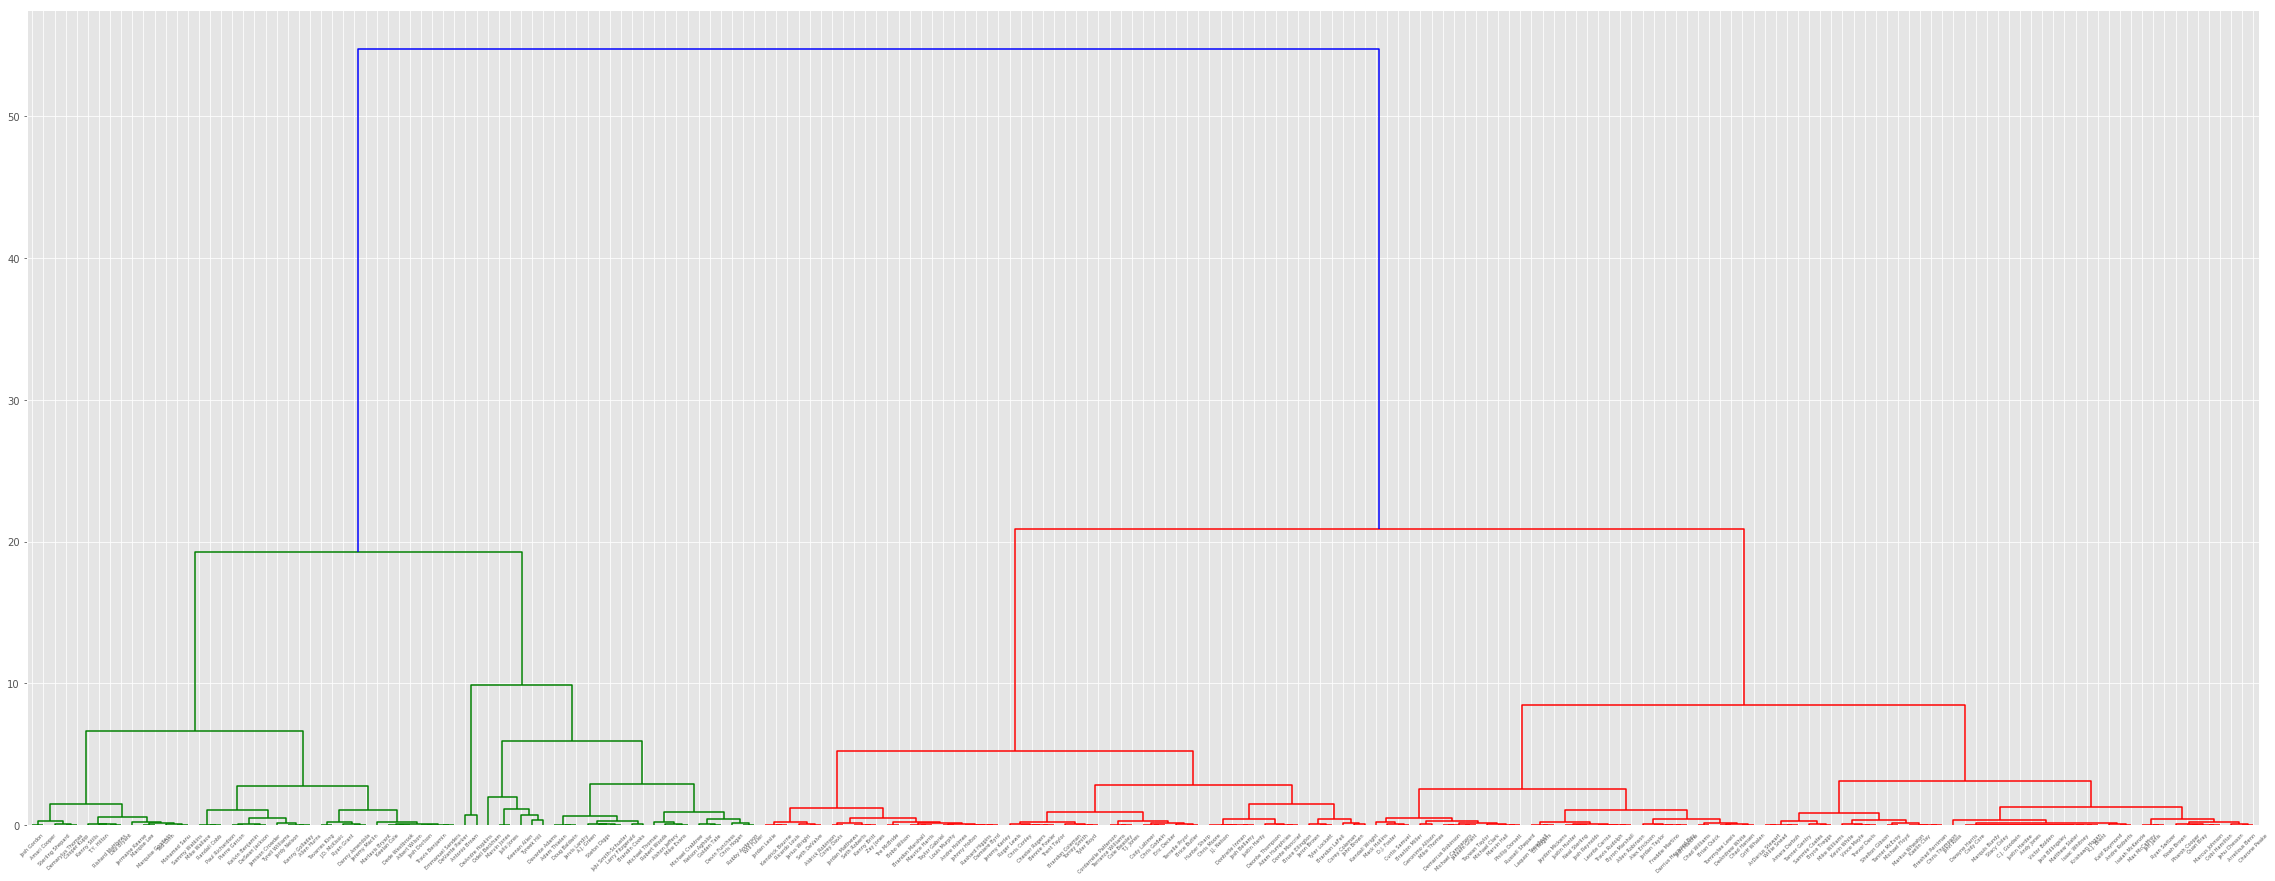

In [3]:
X = df['avg_points'].values.reshape(-1,1)
dist_vector = pdist(X, metric='euclidean')
linkage_mat = hr.linkage(dist_vector, method='ward')
plt.figure(figsize=(40,15));
dendrogram = hr.dendrogram(linkage_mat, labels=df['name'].values);
plt.xticks(rotation=45);
plt.savefig('../plots/dendrogram_ward_linkage_wr')

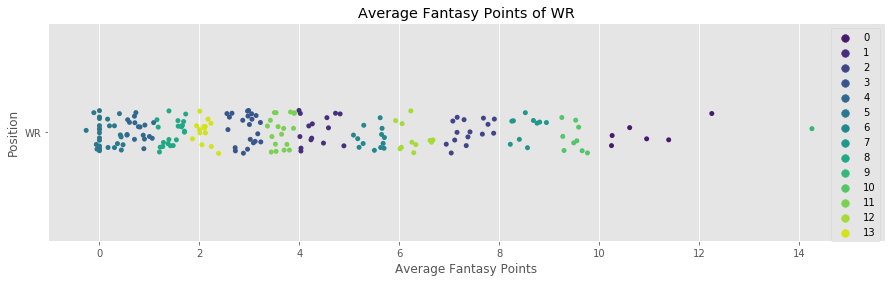

In [4]:
agg = AgglomerativeClustering(n_clusters=14, linkage='ward')
labels = agg.fit_predict(X)

plt.figure(figsize=(15,4));
plt.title('Average Fantasy Points of WR');
sns.stripplot(x="avg_points", y="pos", data=df, hue=labels, palette='viridis', jitter=True);
plt.xlabel('Average Fantasy Points');
plt.ylabel('Position');

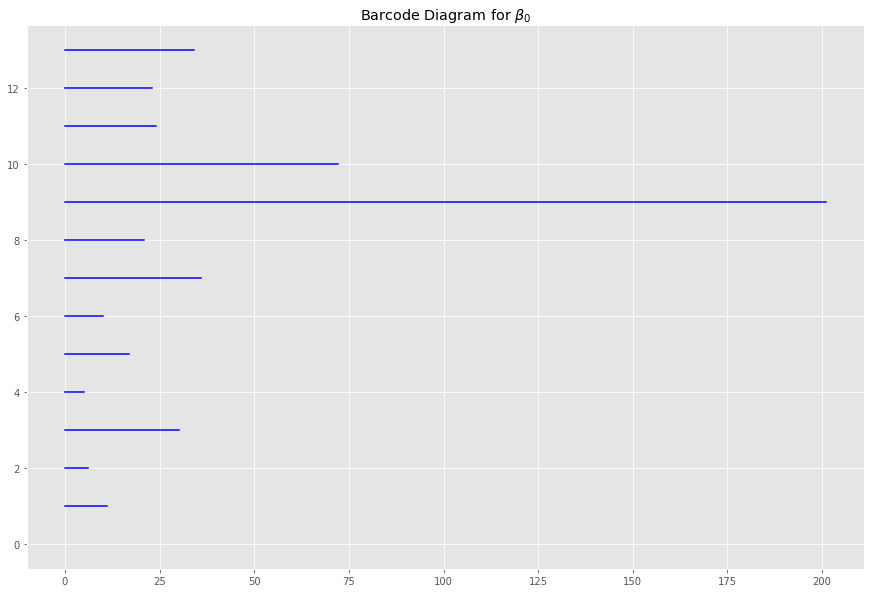

In [5]:
stats = df.iloc[:,4:].values

scaler = MinMaxScaler()
scaled_stats = scaler.fit_transform(stats)

cmapper = ClutchMapper()
cmapper.fit(scaled_stats, labels)

f = cmapper.build_filtration()

ph = d.homology_persistence(f)
dgms = d.init_diagrams(ph, f)

plt.figure(figsize=(15,10));
plt.title('Barcode Diagram for $\\beta_0$');
d.plot.plot_bars(dgms[0], show = True)

In [6]:
wr_complex = cmapper.build_complex(165)

fig = visualize_complex(wr_complex, 'WR Complex')
iplot(fig, filename='wr_complex')

Here 9, and 10 seem to be significantly different.

In [7]:
col_list = ['name']

for col in df.columns[3:]:
    if df[col].max() > 0:
        col_list.append(col)

In [8]:
df['label'] = labels
df.loc[df['label'] == 9, col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumble_recovered_for_td,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_defense_interception,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_fumble_return,avg_touchdown_blocked_kick,avg_blocked_kick_punt_fg_pat,avg_pass_defended,avg_interception_return_yards,avg_fumble_return_yards
0,Antonio Brown,14.950000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.214286,109.500000,0.642857,4.357143,0.0,0.0,0.000000,0.285714,0.071429,0.000000,0.000000,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
1,DeAndre Hopkins,14.253333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.400000,91.866667,0.866667,0.000000,0.0,0.0,0.066667,0.066667,0.000000,0.133333,0.066667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
(df.loc[df['label'] == 9, col_list[1:]].mean() - df[col_list[1:]].mean()) / df[col_list[1:]].std()

avg_points                                3.317229
avg_passing_attempts                     -0.211468
avg_passing_completions                  -0.122600
avg_incomplete_passes                    -0.170390
avg_passing_yards                        -0.103360
avg_passing_touchdowns                   -0.070535
avg_interceptions_thrown                 -0.096987
avg_rushing_attempts                     -0.360684
avg_rushing_yards                        -0.372839
avg_rushing_touchdowns                   -0.140380
avg_receptions                            2.670491
avg_receiving_yards                       3.137489
avg_receiving_touchdowns                  3.187601
avg_kickoff_and_punt_return_yards        -0.297465
avg_kickoff_and_punt_return_touchdowns   -0.220840
avg_fumble_recovered_for_td              -0.121557
avg_fumbles_lost                          0.202595
avg_fumble                                1.067570
avg_2_point_conversions                   1.301861
avg_tackle                     

These guys are obviously high performers even amongst the WR1 tier.

In [10]:
df.loc[df['label'] == 10, col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumble_recovered_for_td,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_defense_interception,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_fumble_return,avg_touchdown_blocked_kick,avg_blocked_kick_punt_fg_pat,avg_pass_defended,avg_interception_return_yards,avg_fumble_return_yards
8,Brandin Cooks,9.762500,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.562500,2.500000,0.0,4.062500,67.625000,0.437500,0.000000,0.000000,0.0,0.0000,0.0000,0.0625,0.062500,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0
9,Michael Thomas,9.656250,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.0,6.500000,77.812500,0.312500,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.312500,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0
10,Stefon Diggs,9.585714,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.571429,0.928571,0.0,4.571429,60.642857,0.571429,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.142857,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0
11,JuJu Smith-Schuster,9.550000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.0,4.142857,65.500000,0.500000,17.142857,0.071429,0.0,0.0000,0.0000,0.0000,0.285714,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0
12,Larry Fitzgerald,9.527500,0.0625,0.0625,0.0000,1.3125,0.0,0.0,0.000000,0.000000,0.0,6.812500,72.250000,0.375000,0.000000,0.000000,0.0,0.0625,0.0625,0.0625,0.000000,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0
13,A.J. Green,9.487500,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.0,4.687500,67.375000,0.500000,0.000000,0.000000,0.0,0.1250,0.1250,0.0000,0.000000,0.0625,0.0,0.0,0.000,0.0,0.0,0.0,0.0625,0.0,0.0
14,Adam Thielen,9.293750,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.062500,0.687500,0.0,5.687500,79.750000,0.250000,0.000000,0.000000,0.0,0.1250,0.1875,0.0000,0.062500,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0
15,Doug Baldwin,9.268750,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.125000,-0.500000,0.0,4.687500,61.937500,0.500000,0.000000,0.000000,0.0,0.0000,0.0000,0.0625,0.187500,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0
16,Jarvis Landry,9.250000,0.0625,0.0000,0.0625,0.0000,0.0,0.0,0.062500,-0.437500,0.0,7.000000,61.687500,0.562500,4.750000,0.000000,0.0,0.1250,0.2500,0.0000,0.437500,0.0000,0.0,0.0,0.125,0.0,0.0,0.0,0.0000,0.0,0.0


This is an interesting one, since they seem to be not quite WR1 material, but high WR2.

In [11]:
(df.loc[df['label'] == 10, col_list[1:]].mean() - df[col_list[1:]].mean()) / df[col_list[1:]].std()

avg_points                                1.728613
avg_passing_attempts                      0.701025
avg_passing_completions                   0.730506
avg_incomplete_passes                     0.362436
avg_passing_yards                         0.454935
avg_passing_touchdowns                   -0.070535
avg_interceptions_thrown                 -0.096987
avg_rushing_attempts                      0.064521
avg_rushing_yards                        -0.169870
avg_rushing_touchdowns                   -0.140380
avg_receptions                            1.813228
avg_receiving_yards                       1.721475
avg_receiving_touchdowns                  1.519399
avg_kickoff_and_punt_return_yards        -0.280661
avg_kickoff_and_punt_return_touchdowns    0.238507
avg_fumble_recovered_for_td              -0.121557
avg_fumbles_lost                          0.498185
avg_fumble                                0.093515
avg_2_point_conversions                   0.659958
avg_tackle                     

In [12]:
df.loc[df['label'].isin([0,1,2,3,4,5,6,7,8,11,12,13]), col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumble_recovered_for_td,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_defense_interception,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_fumble_return,avg_touchdown_blocked_kick,avg_blocked_kick_punt_fg_pat,avg_pass_defended,avg_interception_return_yards,avg_fumble_return_yards
2,Odell Beckham,12.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,2.000000,0.000000,6.250000,75.500000,0.750000,5.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,0.0000
3,Keenan Allen,11.387500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.562500,0.000000,6.375000,87.062500,0.375000,0.000000,0.000000,0.0625,0.000000,0.062500,0.000000,0.062500,0.000000,0.0625,0.000000,0.062500,0.0625,0.000000,0.000000,0.0625,2.0,1.6875
4,Tyreek Hill,10.946667,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667,1.133333,3.933333,0.000000,5.000000,78.866667,0.466667,13.600000,0.066667,0.0000,0.000000,0.133333,0.000000,0.066667,0.000000,0.0000,0.000000,0.133333,0.0000,0.000000,0.000000,0.0000,0.0,0.0000
5,Davante Adams,10.607143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.285714,63.214286,0.714286,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,0.0000
6,Marvin Jones,10.256250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.812500,68.812500,0.562500,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,0.0000
7,Julio Jones,10.243750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.937500,0.000000,5.500000,90.250000,0.187500,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.062500,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,0.0000
17,Robert Woods,8.941667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,1.000000,0.000000,4.666667,65.083333,0.416667,0.000000,0.000000,0.0000,0.083333,0.083333,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,0.0000
18,Mike Evans,8.806667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.733333,66.733333,0.333333,0.000000,0.000000,0.0000,0.000000,0.066667,0.066667,0.200000,0.000000,0.0000,0.000000,0.066667,0.0000,0.000000,0.000000,0.0000,0.0,0.0000
19,Michael Crabtree,8.753846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.461538,47.538462,0.615385,0.000000,0.000000,0.0000,0.000000,0.076923,0.153846,0.153846,0.000000,0.0000,0.000000,0.076923,0.0000,0.000000,0.000000,0.0000,0.0,0.0000
20,Alshon Jeffery,8.681250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.562500,49.312500,0.562500,0.000000,0.000000,0.0000,0.000000,0.000000,0.187500,0.062500,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0625,0.0,0.0000


In [13]:
wr_complex

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 11],
 [0, 12],
 [0, 13],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 11],
 [1, 12],
 [1, 13],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 11],
 [2, 12],
 [2, 13],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 8],
 [3, 11],
 [3, 12],
 [3, 13],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 11],
 [4, 12],
 [4, 13],
 [5, 6],
 [5, 8],
 [5, 11],
 [5, 12],
 [5, 13],
 [6, 7],
 [6, 8],
 [6, 11],
 [6, 12],
 [6, 13],
 [7, 12],
 [8, 11],
 [8, 12],
 [8, 13],
 [11, 12],
 [11, 13],
 [12, 13],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 4],
 [0, 1, 5],
 [0, 1, 6],
 [0, 1, 7],
 [0, 1, 8],
 [0, 1, 11],
 [0, 1, 12],
 [0, 1, 13],
 [0, 2, 3],
 [0, 2, 4],
 [0, 2, 5],
 [0, 2, 6],
 [0, 2, 7],
 [0, 2, 8],
 [0, 2, 11],
 [0, 2, 12],
 [0, 2, 13],
 [0, 3, 4],
 [0, 3, 5],
 [0, 3, 6],
 [0, 3, 8],
 [0, 3, 11],
 [0, 3, 12],
 [0, 3, 13],
 [0, 4, 5],